In [64]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit from the number of displayed columns and rows.
# This is so I can see the entire dataframe when I print it
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_rows', 200)

### Attribute information:

* id - project id
* name - project name
* subcategory - project subcategory
* category - project category
* currency - project currency
* deadline - deadline for crowdfunding on Kickstarter
* goal - goal amount in project currency
* launched - launch date on Kickstarter
* pledged - pledged (raised) amount in the project currency
* state - project state
* backers - count of backers
* country - project country
* usd_pledged_real - pledged (raised) amount in USD
* usd_goal_real - goal amount in USD

In [35]:
df = pd.read_csv("KickStarterProjects.csv")
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

# I'm now going to look at 10 random rows
# I'm setting the random seed via np.random.seed so that
# I get the same random results every time
np.random.seed(1)
df.sample(n=10)

There are 378661 rows and 14 columns.


,ID,name,subcategory,category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
99838,1506962323,2018 Comic Con/ Horror Con/ GMCC,Art,Art,USD,10-10-2017,600.0,31-08-2017 04:05,600.00,successful,4,US,600.00,600.00
15731,1079621785,Ixion's The Four Disgracers,Theater,Theater,USD,26-04-2014,3500.0,27-03-2014 20:21,2920.00,failed,54,US,2920.00,3500.00
339459,799118140,Irving Comics Inc. (Canceled),Comics,Comics,USD,16-04-2015,10000.0,17-03-2015 20:58,75.00,canceled,1,US,75.00,10000.00
100211,1508896926,Breakaway,Shorts,Film & Video,USD,17-10-2011,5000.0,16-09-2011 20:11,5365.00,successful,60,US,5365.00,5000.00
170820,1869016023,the Atomic Café Mobile,Drinks,Food,USD,19-06-2015,5000.0,20-05-2015 10:47,5111.06,successful,53,US,5111.06,5000.00
75113,1382708884,Shaken,Dance,Dance,USD,11-04-2011,2000.0,11-03-2011 05:13,2615.00,successful,51,US,2615.00,2000.00
258934,386894220,Happiness Ambassador Postcard Project Year: 20...,Mixed Media,Art,USD,29-09-2012,800.0,15-09-2012 01:29,80.00,failed,3,US,80.00,800.00
178566,19084902,Unlikely Friends (Short Film),Drama,Film & Video,GBP,13-03-2015,150.0,03-02-2015 09:49,5.00,failed,1,GB,7.39,221.71
33859,1171932479,Would you help a MONSTER make music? Yes or No?,Classical Music,Music,USD,21-09-2014,2000.0,22-08-2014 18:01,2778.00,successful,30,US,2778.00,2000.00
278069,484824490,Dracula: Son of the Dragon,Comics,Comics,USD,17-04-2013,14000.0,18-03-2013 16:54,15172.66,successful,329,US,15172.66,14000.00


In [4]:
df.drop(['currency','goal'], axis=1, inplace=True)
df.sample(n=10)

,ID,name,subcategory,category,deadline,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real
242413,30286735,"McCallum High School ""Bubbles""",Product Design,Design,09-10-2010,19-08-2010 16:25,5871.0,successful,62,US,5871.00,5000.00
312277,660692351,Retail Hell: Do You Work Here?,Comedy,Film & Video,25-06-2014,28-05-2014 01:46,915.0,failed,43,US,915.00,10000.00
123819,1628621400,Modern-Tank,Mobile Games,Games,01-09-2014,03-07-2014 01:59,6.0,failed,2,CA,5.52,5515.72
45483,1231087416,I Am Weird,Children's Books,Publishing,25-05-2016,25-04-2016 23:30,477.0,failed,14,US,477.00,2500.00
146422,1743882617,"""Aces Eye"" Playing Cards (Canceled)",Playing Cards,Games,28-09-2014,30-07-2014 12:43,156.0,canceled,9,GB,250.63,6908.52
181305,1922728817,Pissed OFF Panda I HATE YOU Uncle Sam USA 4x3 ...,Illustration,Art,02-05-2015,20-04-2015 12:27,452.0,successful,31,US,452.00,450.00
63879,1324767593,No-Squeeze Flipping Holder for Food Pouches an...,Product Design,Design,06-06-2016,26-05-2016 00:43,2198.0,successful,64,US,2198.00,2000.00
127449,1646973931,The mountains are calling...,Documentary,Film & Video,06-02-2016,20-12-2015 20:47,0.0,failed,0,DE,0.00,11274.97
234864,263924895,WilkyWay Secret Recipe Fantastic Foods (Canceled),Cookbooks,Food,20-06-2015,21-05-2015 02:23,0.0,canceled,0,US,0.00,1000.00
187756,1955789478,"Thumbelina, an original work by Metropolitan B...",Dance,Dance,02-03-2013,04-02-2013 20:46,2493.0,successful,49,US,2493.00,2200.00


In [18]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string

There are 378661 rows and 12 columns.


In [36]:
name_null_index = df[df['name'].isnull()].index

In [37]:
df.drop(name_null_index, axis=0, inplace=True)

In [38]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.') 

There are 378657 rows and 14 columns.


In [26]:
df['state'].value_counts()

failed        197716
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1845
Name: state, dtype: int64

In [27]:
df['backers'].mean()

105.61854395930882

In [28]:
df['backers'].median()

12.0

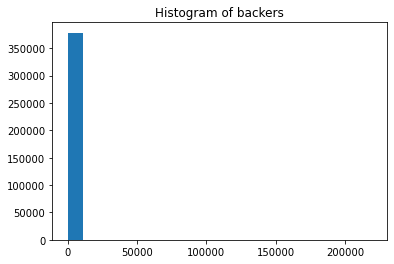

/Users/varathm/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


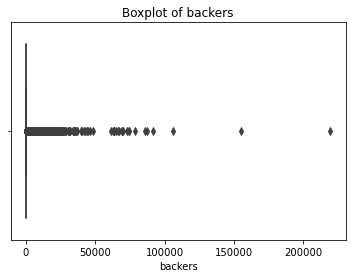

In [39]:
plt.hist(df["backers"], 20)
plt.title("Histogram of backers")
plt.show()

sns.boxplot(df["backers"])
plt.title("Boxplot of backers")
plt.show()

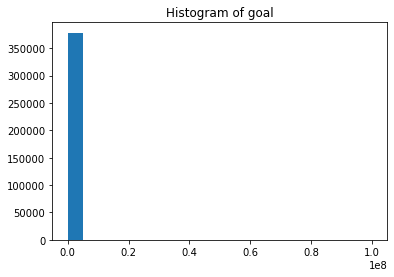

/Users/varathm/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


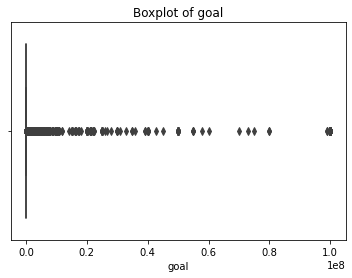

In [41]:
plt.hist(df["goal"], 20)
plt.title("Histogram of goal")
plt.show()

sns.boxplot(df["goal"])
plt.title("Boxplot of goal")
plt.show()

In [43]:
df.sample(n=10)

,ID,name,subcategory,category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged_real,usd_goal_real,goal_scaled
258038,381899192,Diblasio pizza inc,Restaurants,Food,USD,22-02-2015,250000.0,23-01-2015 20:26,1.0,failed,1,US,1.00,250000.0,2.500000e-03
8369,1042258680,Apocalyptest,Animation,Film & Video,USD,01-12-2015,10000.0,01-11-2015 05:05,815.0,failed,6,US,815.00,10000.0,9.999990e-05
103364,1525487375,URBAN OYSTER (Canceled),Small Batch,Food,EUR,01-05-2016,4000.0,05-04-2016 18:55,35.0,canceled,2,IE,39.99,4570.8,3.999990e-05
246083,321486494,Diamond Dogs The Movie,Narrative Film,Film & Video,USD,30-07-2011,5000.0,30-06-2011 23:52,0.0,failed,0,US,0.00,5000.0,4.999990e-05
285801,523897086,Fritz Pastry,Food,Food,USD,10-09-2014,10000.0,04-08-2014 20:49,11000.0,successful,75,US,11000.00,10000.0,9.999990e-05
159368,18104716,Artist Residency/Research of Non-Toxic Printma...,Art,Art,USD,08-10-2016,4500.0,08-09-2016 05:27,4856.0,successful,84,US,4856.00,4500.0,4.499990e-05
215215,2096568857,"Billy BoB's ReDnEcK Scents ""GET YOU SOME!!""",Candles,Crafts,USD,14-07-2016,5000.0,14-06-2016 00:46,50.0,failed,1,US,50.00,5000.0,4.999990e-05
254694,365197450,The Underground,Video Games,Games,USD,30-01-2016,100.0,31-12-2015 18:44,206.0,successful,11,US,206.00,100.0,9.999000e-07
154135,1783434674,"SOME NERVE: A Memoir of Revival, by Wendy Werris",Nonfiction,Publishing,USD,22-07-2015,7200.0,24-06-2015 23:52,7625.0,successful,53,US,7625.00,7200.0,7.199990e-05
198460,2010587970,Saturday Wars: the webcomics crossover OGN,Webcomics,Comics,USD,16-10-2014,10000.0,16-09-2014 05:12,1321.0,failed,46,US,1321.00,10000.0,9.999990e-05


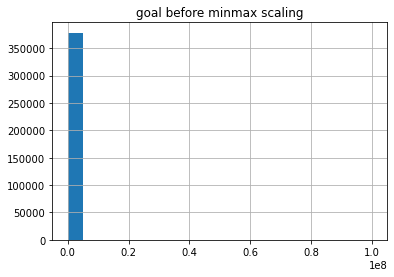

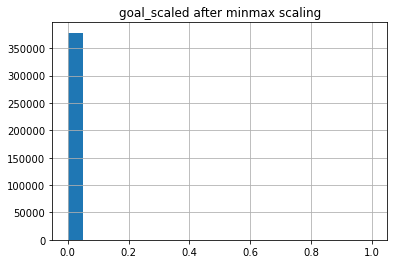

In [42]:
#apply min max scalling for goal

from sklearn.preprocessing import StandardScaler, MinMaxScaler


# replacing with scaled 
df['goal'].hist(bins=20)
plt.title('goal before minmax scaling')
plt.show()

df[['goal_scaled']] = MinMaxScaler().fit_transform(
    df[['goal']]
)

df['goal_scaled'].hist(bins=20)
plt.title('goal_scaled after minmax scaling')
plt.show()

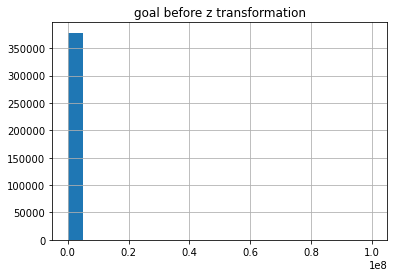

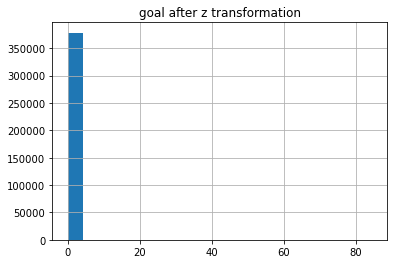

In [44]:
std_scaler = StandardScaler()

df['goal'].hist(bins=20)
plt.title('goal before z transformation')
plt.show()
# fit_transform requires a DataFrame, not a Series, hence
# the double brackets to keep df[['Weight']] as a 1 column 
# DataFrame rather than a Series, like if I did df['Weight']


df['goal_z_std'] = std_scaler.fit_transform(df[['goal']])
df['goal_z_std'].hist(bins=20)
plt.title('goal after z transformation')
plt.show()


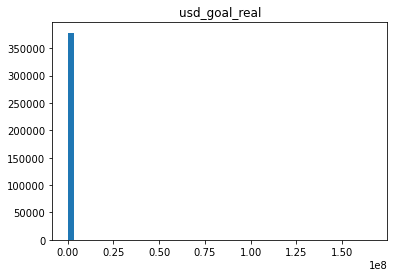

0


In [45]:
cols_to_log = ['usd_goal_real']
for colname in cols_to_log:
    plt.hist(df[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(df[colname] <= 0))

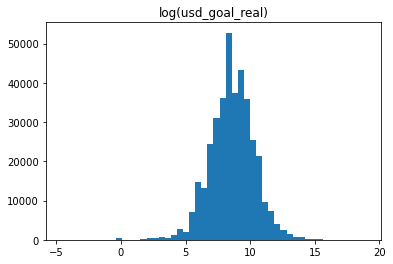

In [48]:
plt.hist(np.log(df['usd_goal_real']), 50)
plt.title('log(usd_goal_real)')
plt.show()

In [49]:
df['launched'] = pd.to_datetime(df['launched'])

In [52]:
df['launched'].dt.month.value_counts()

7     34477
1     34346
10    33409
3     32837
11    32135
8     31619
5     31573
9     31538
6     31381
4     31038
2     29876
12    24428
Name: launched, dtype: int64

In [62]:
df[['category','usd_pledged_real']].groupby('category').mean()['usd_pledged_real'].sort_values(ascending=False)

category
Design          24417.846732
Technology      21151.171165
Games           21042.491442
Comics           6610.443828
Film & Video     6158.073703
Fashion          5712.450839
Food             5113.669716
Theater          4005.918099
Music            3858.367608
Photography      3571.909322
Dance            3452.946356
Publishing       3349.951931
Art              3221.093567
Journalism       2615.702568
Crafts           1632.907282
Name: usd_pledged_real, dtype: float64

In [66]:
df['name'].value_counts().sort_values(ascending=False)

#NAME?                                                         43
New EP/Music Development                                       41
Canceled (Canceled)                                            13
N/A (Canceled)                                                 11
Music Video                                                    11
                                                               ..
Art for You! Starting at $1                                     1
BulletTrain Magic Pencil Holder for Apple Pencil + iPad Pro     1
Ben Ales - Debut Album [The Fool]                               1
New Glowing Spiral Hair Gems                                    1
Get "At Sundown" to the Edinburgh Fringe                        1
Name: name, Length: 375722, dtype: int64